**This notebook presents the results of the model one**
 - Model performances
 - Best model and its hyper parameters
 - Testing the model performances

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

In [3]:
base_url = !pwd
base_url = base_url[0]
result_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelOne', 'best_model', 'models_record.csv'))
result_path

'/home/romainj/code/RomainJupille/wagon/Projet_batteries/BatteryProject/BatteryProject/ModelOne/best_model/models_record.csv'

## Results summary

### Results table

In [4]:
results_df = pd.read_csv(result_path).drop(columns = ['Unnamed: 0'])
results_df

,Try_ID,Model,Scaler,Features_disc_capa,Features_dis_ener,Features_temp_avg,Features_char_capa,Features_eff_ener,Features_char_ener,Features_dc_res,...,Metrics_precision,Metrics_roc_auc,HyperParams_C,HyperParams_max_iter,HyperParams_penalty,HyperParams_solver,HyperParams_min_samples_leaf,HyperParams_min_samples_split,HyperParams_n_estimators,HyperParams_l1_ratio
0,1,LogisticRegression,RobustScaler,X,X,X,X,NaN,NaN,NaN,...,1.000000,0.990000,0.20,500.0,l1,liblinear,NaN,NaN,NaN,NaN
1,2,LogisticRegression,StandardScaler,X,X,X,X,NaN,NaN,NaN,...,1.000000,1.000000,5.00,500.0,l1,liblinear,NaN,NaN,NaN,NaN
2,3,LogisticRegression,MinMaxScaler,X,X,X,X,NaN,NaN,NaN,...,1.000000,0.993333,2.00,1000.0,l1,liblinear,NaN,NaN,NaN,NaN
3,4,RandomForestClassifier,RobustScaler,X,X,X,X,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,1.0,2.0,200.0,NaN
4,5,RandomForestClassifier,StandardScaler,X,X,X,X,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,1.0,2.0,400.0,NaN
5,6,RandomForestClassifier,MinMaxScaler,X,X,X,X,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,1.0,2.0,400.0,NaN
6,7,LogisticRegression,RobustScaler,X,NaN,NaN,NaN,NaN,NaN,NaN,...,0.732353,0.993333,0.05,500.0,elasticnet,saga,NaN,NaN,NaN,0.2
7,8,LogisticRegression,StandardScaler,X,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.993333,0.10,500.0,elasticnet,saga,NaN,NaN,NaN,0.4
8,9,LogisticRegression,MinMaxScaler,X,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.993333,1.00,500.0,l1,liblinear,NaN,NaN,NaN,NaN
9,10,RandomForestClassifier,RobustScaler,X,NaN,NaN,NaN,NaN,NaN,NaN,...,0.969231,1.000000,NaN,NaN,NaN,NaN,1.0,2.0,200.0,NaN


### Performances of the model

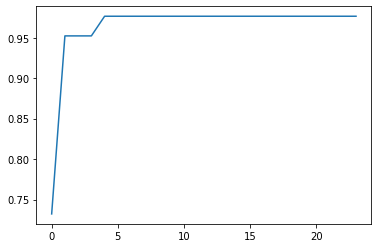

In [5]:
plt.plot(results_df['Metrics_accuracy'].sort_values().values)

## Finding the best model based on evaluation scores

In [6]:
best_model = results_df.sort_values(by=['Metrics_roc_auc','Metrics_accuracy','Metrics_precision'], ascending = False).iloc[0,:]
best_model

Try_ID                                            2
Model                            LogisticRegression
Scaler                               StandardScaler
Features_disc_capa                                X
Features_dis_ener                                 X
Features_temp_avg                                 X
Features_char_capa                                X
Features_eff_ener                               NaN
Features_char_ener                              NaN
Features_dc_res                                 NaN
Features_temp_min                               NaN
Features_temp_max                               NaN
Metrics_accuracy                           0.976471
Metrics_precision                               1.0
Metrics_roc_auc                                 1.0
HyperParams_C                                   5.0
HyperParams_max_iter                          500.0
HyperParams_penalty                              l1
HyperParams_solver                        liblinear
HyperParams_

In [7]:
model

NameError: name 'model' is not defined

## Testing the best model

In [ ]:
model_id = str(best_model['Try_ID'])
for i in range(4-len(model_id)):
    model_id = ''.join(['0',model_id])
model_id

In [ ]:
base_url = !pwd
base_url = base_url[0]

raw_data_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelOne', 'best_model', f"raw_data_{model_id}.csv"))
X_test_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelOne', 'best_model', f"X_test_{model_id}.csv"))
y_test_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelOne', 'best_model' , f"y_test_{model_id}.csv"))
model_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelOne', 'best_model' , f"model_{model_id}.joblib"))

In [ ]:
df_raw_data_model_one = pd.read_csv(raw_data_path).iloc[1:,2:]
df_X_test = pd.read_csv(X_test_path,header=None)
df_y_test = pd.read_csv(y_test_path,header=None)
model = joblib.load(model_path)

### Test a result randomly

**RUN THE CELL BELLOW TO TEST A RANDOM SAMPLE**

In [ ]:
n = np.random.randint(0,df_raw_data_model_one.shape[0]-1)

X_sample = df_X_test.iloc[n,:].values
y_true = df_y_test.iloc[n].values[0]

X_val = df_X_test.iloc[n,:].values.reshape(1, -1)
prediction = model.predict(X_val)[0]
print("Prediction:", prediction)
print('Real value:', int(y_true))

f, axs = plt.subplots(1, 1, figsize=(8, 4))
if prediction == y_true:
    sns.scatterplot(y = df_raw_data_model_one.iloc[n,:].fillna(0), x =np.arange(0,3000,1), ax = axs, color = 'blue', alpha = 0.5)
else:
    sns.scatterplot(y = df_raw_data_model_one.iloc[n,:].fillna(0), x =np.arange(0,3000,1), ax = axs, color = 'red', alpha = 0.5)
sns.lineplot(y = [0.8, 1.2], x = [550,550],color = 'red', ax = axs)
axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.set_ylabel('Capacity (in Ah)')
axs.set_xlabel('Number of cycle')
axs.tick_params(axis='both', which='major', labelsize=10)

if int(y_true) == prediction:
    print('The model got it right !!')
else :
    print('The model is wrong')

### Global performance of the model on the test set

In [ ]:
y_pred = model.predict(df_X_test)
y_pred = y_pred.reshape(y_pred.shape[0],-1)
y_true = df_y_test

In [ ]:
print('Final testing on the test set')
print(f'Accuracy of the model: {accuracy_score(y_pred,y_true)}')
print(f'Precision of the model: {precision_score(y_pred,y_true)}')
print(f'Roc auc of the model: {roc_auc_score(y_pred,y_true)}')